<a href="https://colab.research.google.com/github/mthsansu/MLNLP/blob/main/Code/Descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

In [27]:
import torch
import numpy as np
import datasets
from datasets import load_dataset
from tqdm import tqdm
import nltk
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
import pandas as pd
from collections import Counter
import torchtext
from sklearn.model_selection import train_test_split

from termcolor import colored

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [17]:
# Import data
git_url = "https://raw.githubusercontent.com/mthsansu/MLNLP/main/Data/"
df = pd.read_csv(git_url + 'df_1000_rand_full.csv')

In [40]:
df.head()

,Unnamed: 0,lang,conversation_id,possibly_sensitive,id.x,created_at,author_id,source,text,in_reply_to_user_id,...,place_en_hemicycle,url_an,id_an,slug,url_nosdeputes,url_nosdeputes_api,nb_mandats,twitter.y,age_group,twi_actif
0,477596,fr,1367040568220606465,False,1367040568220606465,2021-03-03T09:14:04.000Z,400123170,Twitter Web App,[COMMISSION DEVELOPPEMENT DURABLE]\r\n<U+0001F...,NaN,...,303,http://www2.assemblee-nationale.fr/deputes/fic...,721372,damien-pichereau,https://www.nosdeputes.fr/damien-pichereau,https://www.nosdeputes.fr/damien-pichereau/csv,1,DamienPichereau,1,1
1,155753,fr,1001836197390450689,False,1001836197390450689,2018-05-30T14:42:17.000Z,377992263,Twitter for iPhone,#DirectAN Explication sur mon vote contre l'in...,NaN,...,143,http://www2.assemblee-nationale.fr/deputes/fic...,267355,antoine-herth,https://www.nosdeputes.fr/antoine-herth,https://www.nosdeputes.fr/antoine-herth/csv,1,antoineherth,3,1
2,669156,fr,913341563614482432,False,913341563614482432,2017-09-28T09:56:12.000Z,881156720155930624,Twitter Web Client,« La 1ère des libertés est la sécurité. Les pe...,NaN,...,13,http://www2.assemblee-nationale.fr/deputes/fic...,720386,fabien-di-filippo,https://www.nosdeputes.fr/fabien-di-filippo,https://www.nosdeputes.fr/fabien-di-filippo/csv,2,FabienDiFilippo,1,1
3,368103,fr,1233088642077413376,False,1233088642077413376,2020-02-27T17:56:56.000Z,866946801726877697,Twitter for iPhone,Les députés communistes ont fini par retirer e...,NaN,...,473,http://www2.assemblee-nationale.fr/deputes/fic...,719310,celia-de-lavergne,https://www.nosdeputes.fr/celia-de-lavergne,https://www.nosdeputes.fr/celia-de-lavergne/csv,1,CdLavergne,2,1
4,333864,fr,862914612651577344,False,862914612651577344,2017-05-12T06:17:30.000Z,832246158391144448,Twitter Web Client,RT @BFMTV: Gérald Dahan évoque sa candidature ...,NaN,...,602,http://www2.assemblee-nationale.fr/deputes/fic...,720286,caroline-fiat,https://www.nosdeputes.fr/caroline-fiat,https://www.nosdeputes.fr/caroline-fiat/csv,1,CarolineFiat54,2,1


In [75]:
years = []
for i in range(len(df)):
  string = str(df.iloc[i]["created_at"])
  years[i] = string[:4]

IndexError: ignored

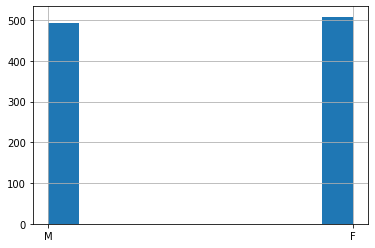

In [29]:
# Plot histogram for sex

hist = df["sexe"].hist()

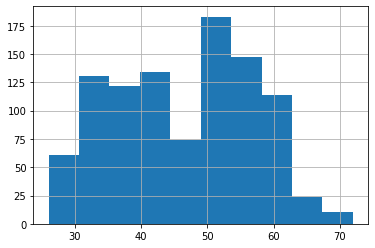

In [32]:
# Plot histogram for age

hist = df["age"].hist()

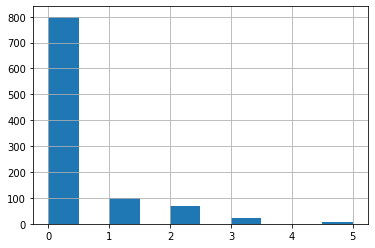

In [37]:
# Plot histogram for nb.mandats

hist = df["nb.mandats"].hist()

In [45]:
# Get number of majo

df.majo.value_counts()

True     655
False    345
Name: majo, dtype: int64

In [48]:
# Get number of profession

df.profession.value_counts()

Cadre sup<e9>rieur (secteur priv<e9>)                                  126
Fonctionnaire de cat<e9>gorie A                                         83
Industriel-Chef d'entreprise                                            58
Professeur du secondaire et technique                                   42
Employ<e9> (secteur priv<e9>)                                           39
                                                                      ... 
Diplomate de carri<e8>re (ministre pl<e9>nipotentiaire en retraite)      1
Enseignant 1er deg.-directeur <e9>cole                                   1
Directrice d<U+0092>un centre de formation des apprentis                 1
Profession lib<e9>rale                                                   1
Infirmi<e8>re dipl<f4>m<e9>e d'Etat                                      1
Name: profession, Length: 93, dtype: int64